In [162]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load training data
train_data = pd.read_csv("Train.csv")
print(train_data)

      Unnamed: 0                                           Name   Location  \
0              0            Tata Tiago 1.2 Revotron XZ WO Alloy  Hyderabad   
1              1     Mahindra TUV 300 2015-2019 mHAWK100 T8 AMT      Kochi   
2              2         Skoda Rapid 2013-2016 1.6 MPI Ambition     Mumbai   
3              3                        Tata Indica V2 DLS BSII     Jaipur   
4              4           Tata Manza Club Class Quadrajet90 LX     Mumbai   
...          ...                                            ...        ...   
3745        3745                                    BMW X5 3.0d    Chennai   
3746        3746  Mahindra Scorpio 2009-2014 VLX 4WD AT 7S BSIV      Delhi   
3747        3747                        Maruti Wagon R LXI BSII  Ahmedabad   
3748        3748                 Renault Duster 85PS Diesel RxL  Hyderabad   
3749        3749                       Maruti Wagon R VXI BS IV    Kolkata   

      Year  Kilometers_Driven Fuel_Type Transmission Owner_Type

In [163]:
# Data cleaning for train_df
train_data=train_data.drop(["Unnamed: 0",'Name'],axis=1)
train_data = pd.get_dummies(train_data, columns=['Location','Fuel_Type','Transmission','Owner_Type'],drop_first ='True')
train_data = train_data.dropna()
train_data.Mileage = train_data.Mileage.str.replace(' kmpl' , ' ').astype(float)
train_data.Engine = train_data.Engine.str.replace(' CC', ' ').astype(int)
train_data['Power'] = train_data['Power'].replace('null bhp', '0 bhp')
train_data.Power = train_data.Power.str.replace(' bhp',' ').astype(float)
print(train_data)

      Year  Kilometers_Driven  Mileage  Engine   Power  Seats  Price  \
0     2017              16500    23.84    1199   84.00    5.0   5.00   
1     2017              47357    18.49    1493  100.00    7.0   8.37   
2     2014              35000    15.00    1598  103.52    5.0   4.50   
3     2007             200000    17.20    1396   53.50    5.0   0.85   
4     2013              64000    21.02    1248   88.76    5.0   2.65   
...    ...                ...      ...     ...     ...    ...    ...   
3745  2009             150000    11.00    2993  235.00    5.0  18.75   
3746  2012              85000    11.79    2179  120.00    7.0   6.25   
3747  2007              55100    18.90     998   67.10    5.0   1.45   
3748  2014              77500    20.45    1461   83.80    5.0   6.60   
3749  2012              40000    18.90     998   67.10    5.0   2.35   

      Location_Bangalore  Location_Chennai  Location_Coimbatore  ...  \
0                  False             False                False

In [164]:
# Z-score normalization we are apllying for extracting numerical coloumns
numerical = train_data.select_dtypes(include=['int64','float64']).columns 
numerical = numerical.drop('Price')
for i in numerical :
    train_data[i]=(train_data[i]-train_data[i].mean())/train_data[i].std()
print(train_data)

          Year  Kilometers_Driven   Mileage    Engine     Power     Seats  \
0     1.128049          -1.028504  1.291151 -0.704021 -0.493044 -0.344671   
1     1.128049          -0.264174  0.088679 -0.214919 -0.206586  2.135759   
2     0.202247          -0.570258 -0.695738 -0.040240 -0.143565 -0.344671   
3    -1.957958           3.516800 -0.201263 -0.376289 -1.039106 -0.344671   
4    -0.106354           0.148073  0.657324 -0.622504 -0.407823 -0.344671   
...        ...                ...       ...       ...       ...       ...   
3745 -1.340757           2.278297 -1.594782  2.280497  2.210409 -0.344671   
3746 -0.414955           0.668244 -1.417221  0.926318  0.151488  2.135759   
3747 -1.957958          -0.072380  0.180831 -1.038406 -0.795616 -0.344671   
3748  0.202247           0.482469  0.529211 -0.268155 -0.496625 -0.344671   
3749 -0.414955          -0.446408  0.180831 -1.038406 -0.795616 -0.344671   

      Price  Location_Bangalore  Location_Chennai  Location_Coimbatore  ...

In [165]:
# Load test data
test_data=pd.read_csv('Test.csv')
test_data

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti Swift Dzire VDI,Hyderabad,2013,84175,Diesel,Manual,First,23.4 kmpl,1248 CC,74 bhp,5.0,6.95
1,1,Hyundai i10 Sportz AT,Delhi,2012,62282,Petrol,Automatic,First,16.95 kmpl,1197 CC,78.9 bhp,5.0,2.90
2,2,Hyundai Elite i20 Sportz Plus,Kochi,2017,37460,Petrol,Manual,First,18.6 kmpl,1197 CC,81.86 bhp,5.0,6.28
3,3,Volvo XC60 D5,Pune,2011,106976,Diesel,Automatic,First,13.5 kmpl,2400 CC,215 bhp,5.0,13.80
4,4,Hyundai i10 Magna 1.2,Delhi,2013,60000,Petrol,Manual,First,20.36 kmpl,1197 CC,78.9 bhp,5.0,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,1245,Hyundai Elantra CRDi SX AT,Delhi,2013,71000,Diesel,Automatic,First,22.7 kmpl,1582 CC,126.2 bhp,5.0,6.80
1246,1246,Hyundai Getz GLS ABS,Pune,2005,91000,Petrol,Manual,Third,16.8 kmpl,1341 CC,83 bhp,5.0,0.80
1247,1247,Volkswagen Polo GT TSI,Coimbatore,2017,50534,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.5 bhp,5.0,8.27
1248,1248,Hyundai Verna SX CRDi AT,Pune,2012,83000,Diesel,Automatic,First,19.08 kmpl,1582 CC,126.32 bhp,5.0,6.00


In [166]:
# clean the data for test file
test_data = test_data.drop(['Unnamed: 0','Name'],axis=1)
test_data = pd.get_dummies(test_data,columns=['Location','Fuel_Type','Transmission','Owner_Type'],drop_first=True)
test_data = test_data.dropna()
test_data.Mileage = test_data.Mileage.str.replace(' kmpl','').astype(float)
test_data.Engine = test_data.Engine.str.replace(' CC','').astype(float)
test_data['Power'] = test_data['Power'].replace('null bhp', '0 bhp')
test_data.Power = test_data.Power.str.replace(' bhp',' ').astype(float)
print(test_data)

      Year  Kilometers_Driven  Mileage  Engine   Power  Seats  Price  \
0     2013              84175    23.40  1248.0   74.00    5.0   6.95   
1     2012              62282    16.95  1197.0   78.90    5.0   2.90   
2     2017              37460    18.60  1197.0   81.86    5.0   6.28   
3     2011             106976    13.50  2400.0  215.00    5.0  13.80   
4     2013              60000    20.36  1197.0   78.90    5.0   2.75   
...    ...                ...      ...     ...     ...    ...    ...   
1245  2013              71000    22.70  1582.0  126.20    5.0   6.80   
1246  2005              91000    16.80  1341.0   83.00    5.0   0.80   
1247  2017              50534    17.21  1197.0  103.50    5.0   8.27   
1248  2012              83000    19.08  1582.0  126.32    5.0   6.00   
1249  2019              13574    21.40  1197.0   83.10    5.0   9.51   

      Location_Bangalore  Location_Chennai  Location_Coimbatore  ...  \
0                  False             False                False

In [167]:
# Separate features and target
Xtr=train_data.drop('Price',axis=1).to_numpy()
Ytr=train_data.Price.to_numpy()
Xte=test_data.drop('Price',axis=1).to_numpy()
Yte=test_data.Price.to_numpy()

print("Shape of X_standarized:", Xtr.shape)
print("Shape of Y_standarized:", Ytr.shape)

Shape of X_standarized: (3717, 22)
Shape of Y_standarized: (3717,)


In [168]:
def metric(ytrue, ypred):
    mse = ((ytrue - ypred) ** 2).mean()
    rmse = mse ** 0.5
    total = ((ytrue - ytrue.mean()) ** 2).sum()
    residuals = ((ytrue - ypred) ** 2).sum()
    r2 = 1 - (residuals / total)
    return mse, rmse, r2

#defining cost function
def cost(X, y, weights, bias, learning_rate):
    m = len(y)
    predictions = X.dot(weights) + bias
    cost_value = (1 / (2 * m)) * np.sum((predictions - y) ** 2) + (learning_rate / (2 * m)) * np.sum(weights ** 2)
    return cost_value
# Gradient descent function
def gradient_descent(X, y, weights, bias, learning_rate, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        predictions = X.dot(weights) + bias
        errors = predictions - y
        weights -= learning_rate * (X.T.dot(errors) / m)
        bias -= learning_rate * (errors.sum() / m)

        # Calculate and store the cost
        cost = ((errors ** 2).sum()) / (2 * m)
        cost_history.append(cost)

        if i % 100 == 0:
            mse, rmse, r2 = metric(y, predictions)
            print(f"Iteration {i}: MSE={mse:.2f}, RMSE={rmse:.2f}, R²={r2:.4f}, Cost={cost:.2f}")

    return weights, bias, cost_history

In [169]:

def train_model(X, y, learning_rate, iterations):
    X = np.array(X, dtype=np.float64)
    y = np.array(y, dtype=np.float64)
    n_features = X.shape[1]
    weights = np.zeros(n_features, dtype=np.float64)
    bias = 0.0

    weights, bias, cost_history = gradient_descent(X, y, weights, bias, learning_rate, iterations)
    return weights, bias, cost_history

# learning parameters
learning_rate = 0.01
iterations = 1000
weights, bias, cost_history = train_model(Xtr, Ytr, learning_rate, iterations)
print("\nFinal cost:", cost_history[-1])
print("Final weights:", weights)
print("Final bias:", bias)
    

Iteration 0: MSE=216.63, RMSE=14.72, R²=-0.7197, Cost=108.31
Iteration 100: MSE=56.31, RMSE=7.50, R²=0.5530, Cost=28.15
Iteration 200: MSE=47.11, RMSE=6.86, R²=0.6261, Cost=23.55
Iteration 300: MSE=45.23, RMSE=6.73, R²=0.6409, Cost=22.62
Iteration 400: MSE=44.22, RMSE=6.65, R²=0.6490, Cost=22.11
Iteration 500: MSE=43.46, RMSE=6.59, R²=0.6550, Cost=21.73
Iteration 600: MSE=42.85, RMSE=6.55, R²=0.6599, Cost=21.42
Iteration 700: MSE=42.33, RMSE=6.51, R²=0.6639, Cost=21.17
Iteration 800: MSE=41.90, RMSE=6.47, R²=0.6674, Cost=20.95
Iteration 900: MSE=41.53, RMSE=6.44, R²=0.6703, Cost=20.77

Final cost: 20.610503127027872
Final weights: [ 3.16244714e+00 -9.30642602e-01 -8.37675444e-01  3.20904910e+00
  5.06441103e+00 -1.48313523e+00  1.42474309e+00  1.05929310e+00
  2.15035090e+00 -7.38529671e-02  2.44411419e+00  8.20118603e-01
  7.10346614e-01 -4.25019629e-01 -1.87605091e-01  7.47956608e-01
  0.00000000e+00 -1.03340121e+00 -1.41733410e-01  1.30640796e-03
  3.00900300e-01  2.67344866e-01]
Fi

In [170]:
# Calculate metrics
train_predictions = Xtr.dot(weights) + bias
test_predictions = Xte.dot(weights) + bias

_,_,r2_train = metric(Ytr, train_predictions)
_,_,r2_test = metric(Yte, test_predictions)

# Print R² scores
print(f"Training R² Score: {r2_train * 100:.2f}%")
print(f"Testing R² Score: {r2_test * 100:.2f}%")

Training R² Score: 67.28%
Testing R² Score: -25635248300.10%


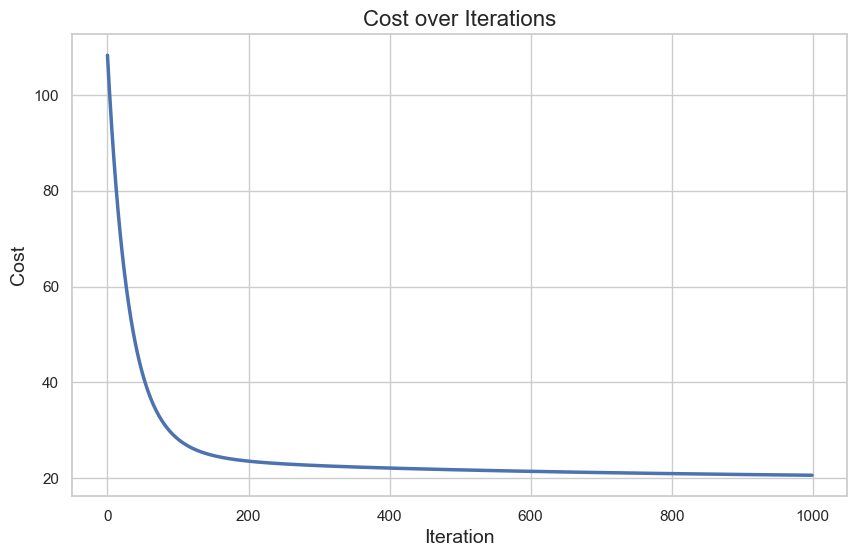

In [171]:
cost_df = pd.DataFrame({
    'Iteration': np.arange(len(cost_history)),
    'Cost': cost_history
})
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=cost_df, x='Iteration', y='Cost', linewidth=2.5)
plt.title('Cost over Iterations', fontsize=16)
plt.xlabel('Iteration', fontsize=14)
plt.ylabel('Cost', fontsize=14)
plt.show()

In [172]:
#plt.scatter(Yte, test_predictions, color='blue', alpha=0.5)
#plt.plot([min(Ytr), max(Ytr)], [min(Ytr), max(Ytr)], color='red', label='Ideal Fit')
#plt.xlabel('Actual Prices')
#plt.ylabel('Predicted Prices')
#plt.title('Actual vs Predicted Prices')
#plt.legend()
#plt.show()